In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.74135695, -0.36547596, -0.94695304,  0.64916583,  0.35330386,
         0.26955119,  0.17682689,  0.47344915,  2.244552  , -1.24559411],
       [-0.62905808, -0.57675853, -0.67377538,  0.05127189, -0.17245044,
         0.53476918,  0.39345365,  0.57768938,  0.12752947, -1.06938467]])

In [4]:
test_Features[:2]

array([[ 0.52906909,  0.30154051, -0.07642407, -0.69267666, -0.74345037,
         1.33468128,  1.08317999,  1.02271499, -0.6234091 ,  1.08860119],
       [ 0.49702046, -0.61834349,  0.40052593, -0.77308875, -0.81765321,
        -0.38792411,  0.34908004,  0.44525963, -0.39189873,  0.25487781]])

In [5]:
train_Label[:4]

array([1, 0, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 0, 0, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*8,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 160)               1760      
_________________________________________________________________
dense_2 (Dense)              (None, 140)               22540     
_________________________________________________________________
dense_3 (Dense)              (None, 120)               16920     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2440      
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 5s - loss: 0.6892 - acc: 0.6360 - val_loss: 0.6796 - val_acc: 0.6610
Epoch 2/30
 - 1s - loss: 0.5800 - acc: 0.6452 - val_loss: 0.4853 - val_acc: 0.6610
Epoch 3/30
 - 1s - loss: 0.4644 - acc: 0.7408 - val_loss: 0.4119 - val_acc: 0.8272
Epoch 4/30
 - 1s - loss: 0.3766 - acc: 0.8426 - val_loss: 0.3591 - val_acc: 0.8620
Epoch 5/30
 - 1s - loss: 0.3500 - acc: 0.8587 - val_loss: 0.3429 - val_acc: 0.8719
Epoch 6/30
 - 1s - loss: 0.3406 - acc: 0.8624 - val_loss: 0.3373 - val_acc: 0.8640
Epoch 7/30
 - 2s - loss: 0.3333 - acc: 0.8639 - val_loss: 0.3290 - val_acc: 0.8725
Epoch 8/30
 - 1s - loss: 0.3233 - acc: 0.8670 - val_loss: 0.3268 - val_acc: 0.8706
Epoch 9/30
 - 1s - loss: 0.3221 - acc: 0.8673 - val_loss: 0.3315 - val_acc: 0.8712
Epoch 10/30
 - 1s - loss: 0.3221 - acc: 0.8669 - val_loss: 0.3260 - val_acc: 0.8706
Epoch 11/30
 - 1s - loss: 0.3151 - acc: 0.8701 - val_loss: 0.3301 - val_acc: 0.8673
Epoch 12/30
 - 1s - loss: 0.3090 - a

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

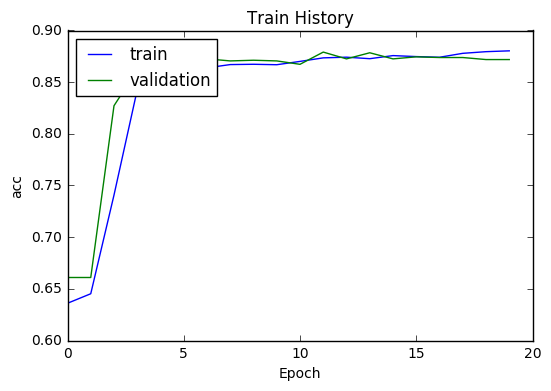

In [23]:
show_train_history(train_history,'acc','val_acc')

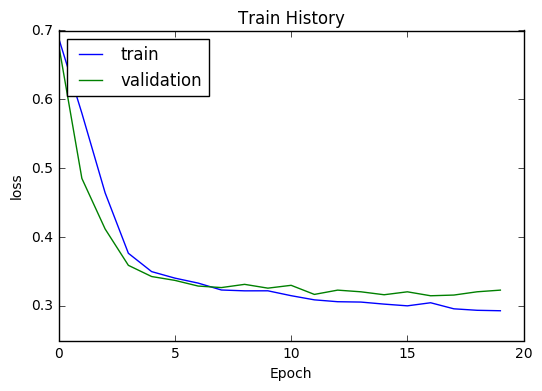

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 36us/step


In [26]:
scores[1]

0.8772344899478395